In [48]:
import json
with open("eye_tracking_data/2024-12-16_13_14_01.437830.txt") as file:
    js = json.load(file)
    print(js)

{'eye_tracking_data': {'Wideo': [{'event_id': 2, 'miliseconds_since_start': 2213.5143000000003, 'has_started_looking': True}, {'event_id': 3, 'miliseconds_since_start': 2317.799, 'has_started_looking': False}, {'event_id': 4, 'miliseconds_since_start': 2941.4603, 'has_started_looking': True}, {'event_id': 7, 'miliseconds_since_start': 5130.5335000000005, 'has_started_looking': False}, {'event_id': 8, 'miliseconds_since_start': 5830.401800000001, 'has_started_looking': True}, {'event_id': 9, 'miliseconds_since_start': 5831.4026, 'has_started_looking': False}, {'event_id': 10, 'miliseconds_since_start': 5862.4017, 'has_started_looking': True}, {'event_id': 11, 'miliseconds_since_start': 5865.4016, 'has_started_looking': False}, {'event_id': 12, 'miliseconds_since_start': 5867.4016, 'has_started_looking': True}, {'event_id': 15, 'miliseconds_since_start': 7522.807500000001, 'has_started_looking': False}, {'event_id': 16, 'miliseconds_since_start': 7987.2453000000005, 'has_started_looking'

In [49]:
eyetrackdata = 0
for key in js["eye_tracking_data"]:
    print(key)

    eyetrackdata = list(js["eye_tracking_data"][key])

print(eyetrackdata)

eyetrackdata.sort(key=lambda x :x["event_id"])
print(eyetrackdata)

Wideo
[{'event_id': 2, 'miliseconds_since_start': 2213.5143000000003, 'has_started_looking': True}, {'event_id': 3, 'miliseconds_since_start': 2317.799, 'has_started_looking': False}, {'event_id': 4, 'miliseconds_since_start': 2941.4603, 'has_started_looking': True}, {'event_id': 7, 'miliseconds_since_start': 5130.5335000000005, 'has_started_looking': False}, {'event_id': 8, 'miliseconds_since_start': 5830.401800000001, 'has_started_looking': True}, {'event_id': 9, 'miliseconds_since_start': 5831.4026, 'has_started_looking': False}, {'event_id': 10, 'miliseconds_since_start': 5862.4017, 'has_started_looking': True}, {'event_id': 11, 'miliseconds_since_start': 5865.4016, 'has_started_looking': False}, {'event_id': 12, 'miliseconds_since_start': 5867.4016, 'has_started_looking': True}, {'event_id': 15, 'miliseconds_since_start': 7522.807500000001, 'has_started_looking': False}, {'event_id': 16, 'miliseconds_since_start': 7987.2453000000005, 'has_started_looking': True}, {'event_id': 17, 

In [50]:
totalcount =  eyetrackdata[-1]['event_id']

totallooktime = 0
prev_timestamp = 0
prev_started = False
timestamps = totalcount * [0,]
totallooktime_for_each_timestamp = totalcount * [0,]

print(f"total time {totallooktime}")
for event in eyetrackdata:
    current_timestamp = event['miliseconds_since_start']
    timestamps.append(current_timestamp/1000)
        
    if prev_started and not event['has_started_looking']:
        totallooktime += current_timestamp - prev_timestamp
        totallooktime_for_each_timestamp.append(totallooktime/1000)
    else:
        totallooktime_for_each_timestamp.append(totallooktime/1000)

        

    prev_timestamp = current_timestamp
    prev_started = event['has_started_looking']


total time 0


In [51]:
print(len(timestamps))
len(totallooktime_for_each_timestamp)

42


42

In [52]:
print(timestamps,totallooktime_for_each_timestamp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.2135143000000004, 2.317799, 2.9414603, 5.1305335, 5.830401800000001, 5.8314026000000005, 5.8624017, 5.8654016, 5.8674016, 7.522807500000001, 7.9872453000000005, 8.0012448, 8.0172448, 13.135896800000001] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.1042846999999997, 0.1042846999999997, 2.2933579, 2.2933579, 2.2943586999999996, 2.2943586999999996, 2.2973585999999995, 2.2973585999999995, 3.9527645000000002, 3.9527645000000002, 3.966764, 3.966764, 9.085416]


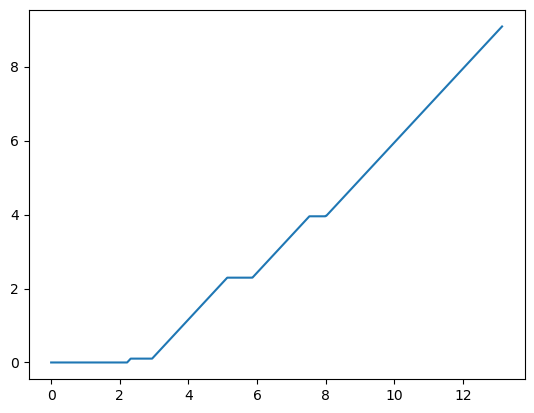

In [53]:
import matplotlib.pyplot as plt

plt.plot(timestamps,totallooktime_for_each_timestamp)

In [54]:
stepdata = list(js["step_switches"])
stepdata.sort(key = lambda x : x["event_id"])


In [55]:
step_timestamps = []
steps = []

for event in stepdata:
    step_timestamps.append(event["miliseconds_since_start"]/1000)
    steps.append(event["step_number"])

In [56]:
print(step_timestamps)

[0.0, 1.8579758000000002, 4.238881500000001, 4.771675500000001, 6.890496, 7.145188300000001, 9.014987000000001, 9.4311119, 9.9504677, 10.4226008, 10.7169663, 10.9798732, 11.268100500000001, 11.5588695, 11.8796093, 13.1368963]


In [57]:
print(step_timestamps,steps)
print(timestamps,totallooktime_for_each_timestamp)

time_spent_at_step_switch = []
for t,step in zip(step_timestamps,steps):
    

    i = 0
    while timestamps[i] < t:
        if i >= len(timestamps)-1:
            break
        i += 1

    tt0 = totallooktime_for_each_timestamp[i-1]
    tt1 = totallooktime_for_each_timestamp[i]

    t0 = timestamps[i-1]
    t1 = timestamps[i]

    interpolated_time = tt0 + (t-t0)*(tt1-tt0)/(t1-t0)
    time_spent_at_step_switch.append((step,interpolated_time))

print(time_spent_at_step_switch)

[0.0, 1.8579758000000002, 4.238881500000001, 4.771675500000001, 6.890496, 7.145188300000001, 9.014987000000001, 9.4311119, 9.9504677, 10.4226008, 10.7169663, 10.9798732, 11.268100500000001, 11.5588695, 11.8796093, 13.1368963] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.2135143000000004, 2.317799, 2.9414603, 5.1305335, 5.830401800000001, 5.8314026000000005, 5.8624017, 5.8654016, 5.8674016, 7.522807500000001, 7.9872453000000005, 8.0012448, 8.0172448, 13.135896800000001] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.1042846999999997, 0.1042846999999997, 2.2933579, 2.2933579, 2.2943586999999996, 2.2943586999999996, 2.2973585999999995, 2.2973585999999995, 3.9527645000000002, 3.9527645000000002, 3.966764, 3.966764, 9.085416]
[(0, 0.0), (1, 0.0), (2, 1.4017059000000005), (3, 1.9344999000000007), (4, 3.320452999999999), (5, 3.575145300000001), (6, 4.96

In [65]:
time_spent_step = []
prev_time = time_spent_at_step_switch[0][1]
for step,time in time_spent_at_step_switch :
    
    time_spent_step.append((step,time - prev_time))
    prev_time = time

print(time_spent_step)
 

[(0, 0.0), (1, 0.0), (2, 1.4017059000000005), (3, 0.5327940000000002), (4, 1.3859530999999985), (5, 0.25469230000000165), (6, 1.3893608999999998), (7, 0.416124899999998), (8, 0.5193558000000014), (9, 0.47213309999999886), (10, 0.2943654999999996), (11, 0.26290690000000083), (12, 0.28822730000000085), (13, 0.29076899999999917), (14, 0.32073980000000013), (15, 1.2572869999999998)]


In [59]:
time_spent_per_step = {}
for step,time in time_spent_step:
    if step not in time_spent_per_step:
        time_spent_per_step[step] = time
    else:
        time_spent_per_step[step] += time
print(time_spent_per_step)

{0: 0.0, 1: 0.0, 2: 1.4017059000000005, 3: 0.5327940000000002, 4: 1.3859530999999985, 5: 0.25469230000000165, 6: 1.3893608999999998, 7: 0.416124899999998, 8: 0.5193558000000014, 9: 0.47213309999999886, 10: 0.2943654999999996, 11: 0.26290690000000083, 12: 0.28822730000000085, 13: 0.29076899999999917, 14: 0.32073980000000013, 15: 1.2572869999999998}


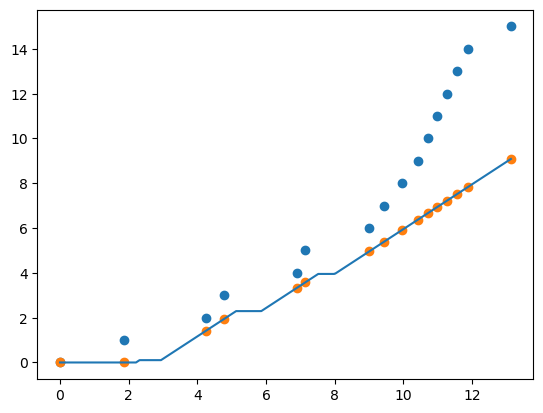

In [60]:
plt.plot(timestamps,totallooktime_for_each_timestamp)
plt.scatter(step_timestamps,steps)
Y = list(map(lambda x : x[1],time_spent_at_step_switch))
plt.scatter(step_timestamps,Y)

In [61]:
time_spent = []
prev_time = step_timestamps[0]
for timestamp,istep in zip(step_timestamps[1:],steps[:-1]):
    
    time_spent.append((istep,timestamp - prev_time))
    prev_time = timestamp
 

In [62]:
time_spent

[(0, 1.8579758000000002),
 (1, 2.3809057000000005),
 (2, 0.532794),
 (3, 2.118820499999999),
 (4, 0.2546923000000012),
 (5, 1.8697987000000005),
 (6, 0.416124899999998),
 (7, 0.5193558000000014),
 (8, 0.47213309999999886),
 (9, 0.2943654999999996),
 (10, 0.26290690000000083),
 (11, 0.28822730000000085),
 (12, 0.29076899999999917),
 (13, 0.32073980000000013),
 (14, 1.2572869999999998)]

In [63]:
time_per_step = {}
for step,time in time_spent:
    if step not in time_per_step:
        time_per_step[step] = time/1000
    else:
        time_per_step[step] += time/1000


In [64]:
print(time_per_step)

{0: 0.0018579758000000003, 1: 0.0023809057000000007, 2: 0.000532794, 3: 0.0021188204999999993, 4: 0.0002546923000000012, 5: 0.0018697987000000004, 6: 0.000416124899999998, 7: 0.0005193558000000013, 8: 0.00047213309999999886, 9: 0.0002943654999999996, 10: 0.00026290690000000083, 11: 0.00028822730000000086, 12: 0.00029076899999999915, 13: 0.0003207398000000001, 14: 0.0012572869999999997}


In [68]:
f = r".\eye_tracking_data\2024-12-16_13_14_01.437830.txt"

In [69]:
f

'.\\eye_tracking_data\\2024-12-16_13_14_01.437830.txt'